In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from functools import reduce
import numpy as np
from scipy import stats
from Bio.motifs import transfac 

In [2]:
def getData(file):
    f=open(file)
    arr = []
    lines=list(map(lambda x: x.strip(), f.readlines()))
    for line in lines:
        s = line.split(" ")
        arr.append((s[0], s[1], float(s[2])))
    return arr
def Average(lst):
    return sum(map(lambda a: a[2], lst)) / len(lst)
def tTest(a, b):
    t, p = stats.ttest_ind(a,b)
    print("t = " + "{:.5f}".format(t) + "\tp = " + "{:.5e}".format(p)) # low is good! i.e. lt 0.05 is acceptable

In [4]:
rnd_2d = getData("rnd_l10_2d.scores")
rnd_1d = getData("rnd_l10_1d.scores")
rnd_0d = getData("rnd_l10_0d.scores")
low_c = getData("low_c_l10.scores")
high_c = getData("high_c_l10.scores")

In [7]:
len(rnd_2d)

2998

In [41]:
print(Average(rnd_2d), Average(rnd_1d), Average(rnd_0d), Average(low_c), Average(high_c))

0.5535290193462303 0.5530990660440293 0.5499486495498485 0.5459123032444592 0.6047073813708256


In [42]:
print("low c vs random")
tTest(list(map(lambda x: x[2], low_c)), list(map(lambda x: x[2], rnd_2d)))
tTest(list(map(lambda x: x[2], low_c)), list(map(lambda x: x[2], rnd_1d)))
tTest(list(map(lambda x: x[2], low_c)), list(map(lambda x: x[2], rnd_0d)))
print("high c vs random")
tTest(list(map(lambda x: x[2], high_c)), list(map(lambda x: x[2], rnd_2d)))
tTest(list(map(lambda x: x[2], high_c)), list(map(lambda x: x[2], rnd_1d)))
tTest(list(map(lambda x: x[2], high_c)), list(map(lambda x: x[2], rnd_0d)))

low c vs random
t = -3.56815	p = 3.62275e-04
t = -3.40587	p = 6.63782e-04
t = -1.92166	p = 5.46954e-02
high c vs random
t = 17.22130	p = 5.24332e-65
t = 17.46009	p = 9.91217e-67
t = 18.56704	p = 5.34967e-75


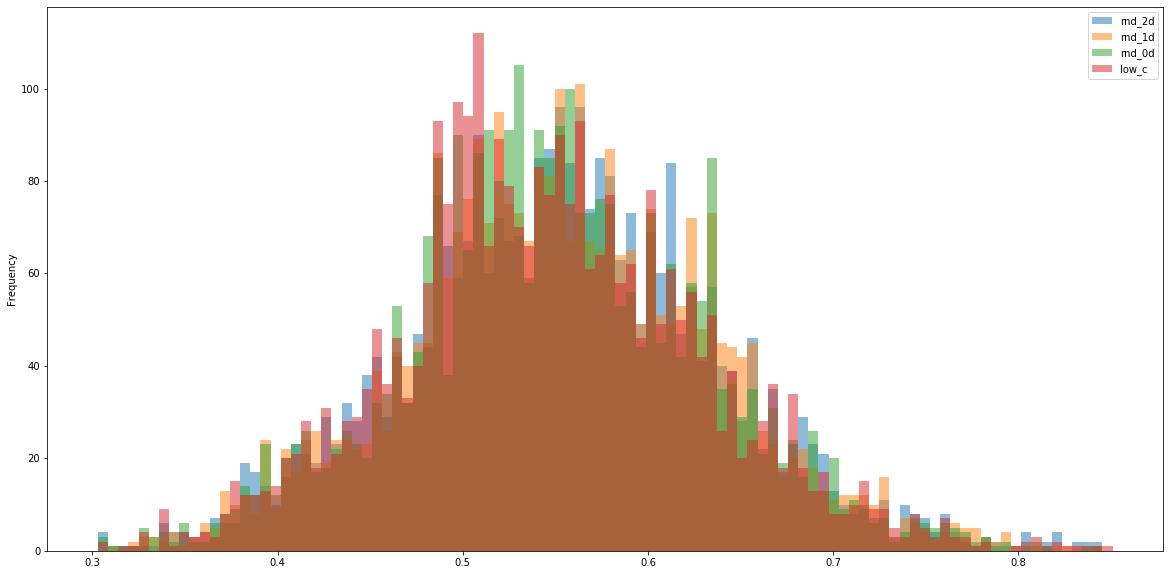

In [46]:
%matplotlib inline
plt.rcParams["figure.figsize"] = [20, 10]

size=min(len(rnd_2d), len(rnd_1d), len(rnd_0d), len(low_c), len(high_c))
df = pd.DataFrame({
    'rnd_2d': list(map(lambda x: x[2], rnd_2d))[-size:],
    'rnd_1d': list(map(lambda x: x[2], rnd_1d))[-size:],
    'rnd_0d': list(map(lambda x: x[2], rnd_0d))[-size:],
    'low_c':  list(map(lambda x: x[2], low_c))[-size:], # basically sample N 
})
df.plot.hist(bins = 100, alpha=0.5)

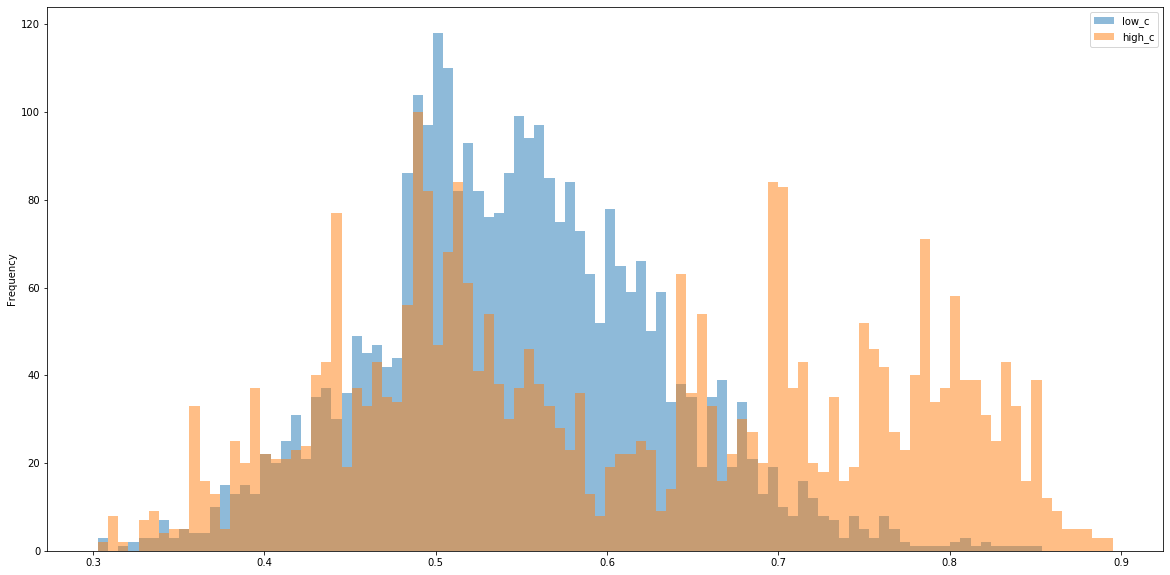

In [47]:
%matplotlib inline
plt.rcParams["figure.figsize"] = [20, 10]

size=min(len(low_c), len(high_c))
df = pd.DataFrame({
    'low_c':  list(map(lambda x: x[2], low_c))[-size:], # basically sample N 
    'high_c': list(map(lambda x: x[2], high_c))[-size:], #[-size:],
})
df.plot.hist(bins = 100, alpha=0.5)

In [48]:
jaspar_motifs = transfac.read(open("../jaspar.txt"))
jaspar_motifs_dict = { jaspar_motifs[i]["AC"] : jaspar_motifs[i].degenerate_consensus for i in range(0, len(jaspar_motifs) ) }
top = 10

In [51]:
high_c_top = sorted(high_c, key = lambda x: x[2])[-top:]
high_c_bls_motifs = transfac.read(open("high_c_l10.txt"))
high_c_bls_motifs_dict = { high_c_bls_motifs[i]["AC"] : high_c_bls_motifs[i].degenerate_consensus for i in range(0, len(high_c_bls_motifs) ) }
print("highest high c")
for el in list(map(lambda x: (high_c_bls_motifs_dict[x[0]], jaspar_motifs_dict[x[1]], x[2]), high_c_top)):
    print(el)
high_c_top = sorted(high_c, key = lambda x: x[2])[0:top]
high_c_bls_motifs = transfac.read(open("high_c_l10.txt"))
high_c_bls_motifs_dict = { high_c_bls_motifs[i]["AC"] : high_c_bls_motifs[i].degenerate_consensus for i in range(0, len(high_c_bls_motifs) ) }
print("lowest high c")
for el in list(map(lambda x: (high_c_bls_motifs_dict[x[0]], jaspar_motifs_dict[x[1]], x[2]), high_c_top)):
    print(el)
print("jaspar motifs covered:", len(set(map(lambda x: x[1], high_c))))

highest high c
(Seq('GCCGCCGCCA'), Seq('NSCGCCGCCN'), 0.878)
(Seq('GCCGCCGMCR'), Seq('NSCGCCGCCN'), 0.88)
(Seq('GMCGCCGCCR'), Seq('NSCGCCGCCN'), 0.881)
(Seq('GYCGCCGCCR'), Seq('NSCGCCGCCN'), 0.883)
(Seq('GCCGCCGYCR'), Seq('NSCGCCGCCN'), 0.884)
(Seq('GCCGCCGCCR'), Seq('NSCGCCGCCN'), 0.884)
(Seq('CCGCCGCCRY'), Seq('NCCGCCGCCRY'), 0.888)
(Seq('RCACATGCAT'), Seq('NNACATGCAW'), 0.891)
(Seq('KCCGCCGCCR'), Seq('NSCGCCGCCN'), 0.894)
(Seq('RCCGCCGCCR'), Seq('NSCGCCGCCN'), 0.895)
lowest high c
(Seq('AGCAGYAGYA'), Seq('CGTACGNC'), 0.303)
(Seq('GYAGCAGMAG'), Seq('NNNGCAGACATNN'), 0.307)
(Seq('WGCAGCAGCT'), Seq('TGCAAGTKGNN'), 0.309)
(Seq('GYAGCAGCWG'), Seq('NNNGCAGACATNN'), 0.309)
(Seq('AGCAGCAGCT'), Seq('TGCAAGTKGNN'), 0.309)
(Seq('GCAGCAGCWS'), Seq('CNCCGCCGCCN'), 0.312)
(Seq('AGCWAGCTMG'), Seq('TTGACCGAGYN'), 0.312)
(Seq('GCAGCAGCWG'), Seq('CNCCGCCGCCN'), 0.312)
(Seq('AGCAGCWGYA'), Seq('CGTACGNC'), 0.313)
(Seq('CSSAGGGAGT'), Seq('CCTCGTAC'), 0.313)
jaspar motifs covered: 108


In [52]:
low_c_top = sorted(low_c, key = lambda x: x[2])[-top:]
low_c_bls_motifs = transfac.read(open("low_c_l10.txt"))
low_c_bls_motifs_dict = { low_c_bls_motifs[i]["AC"] : low_c_bls_motifs[i].degenerate_consensus for i in range(0, len(low_c_bls_motifs) ) }
print("highest low c")
for el in list(map(lambda x: (low_c_bls_motifs_dict[x[0]], jaspar_motifs_dict[x[1]], x[2]), low_c_top)):
    print(el)
low_c_top = sorted(low_c, key = lambda x: x[2])[0:top]
low_c_bls_motifs = transfac.read(open("low_c_l10.txt"))
low_c_bls_motifs_dict = { low_c_bls_motifs[i]["AC"] : low_c_bls_motifs[i].degenerate_consensus for i in range(0, len(low_c_bls_motifs) ) }
print("lowest low c")
for el in list(map(lambda x: (low_c_bls_motifs_dict[x[0]], jaspar_motifs_dict[x[1]], x[2]), low_c_top)):
    print(el)
print("jaspar motifs covered:", len(set(map(lambda x: x[1], low_c))))

highest low c
(Seq('AATCTYARAT'), Seq('ATCNAAGATTC'), 0.812)
(Seq('GKGGGGCCRA'), Seq('NGGGNCCCAC'), 0.812)
(Seq('ARCACGTGAT'), Seq('NNCACGTGNN'), 0.813)
(Seq('AACWGACART'), Seq('NACTGACAGT'), 0.82)
(Seq('CTNCCGACAM'), Seq('NTGCCGACAN'), 0.82)
(Seq('GRGGGAYCAC'), Seq('NKGGGACCAC'), 0.826)
(Seq('MCAATAATNG'), Seq('NCAATAATTGN'), 0.832)
(Seq('MAAGATACNC'), Seq('NMGWATCTTN'), 0.84)
(Seq('GAWWATATCT'), Seq('AGATATTTTN'), 0.845)
(Seq('NCCACGTGSG'), Seq('NNCACGTGNN'), 0.851)
lowest low c
(Seq('CAGYCCTSTA'), Seq('CRCCGMCN'), 0.303)
(Seq('GCACTKCGAR'), Seq('NNCATGCRNNT'), 0.306)
(Seq('CAATMCCCCK'), Seq('NRGTCAANNN'), 0.308)
(Seq('AGWCYCATAG'), Seq('GGGACCAC'), 0.315)
(Seq('ATAKGAGCWG'), Seq('NNWTATTC'), 0.323)
(Seq('KTCGCGATAM'), Seq('AAGATACGST'), 0.326)
(Seq('TAGYCTAGAG'), Seq('GAAGNTTCTAGA'), 0.327)
(Seq('AGTCCKGCWC'), Seq('NNNGCACGTGNN'), 0.328)
(Seq('ATACTGCNCK'), Seq('NNMRNATCTN'), 0.33)
(Seq('YGAGKGCAAT'), Seq('NNNNGTAATGATTRCNYBS'), 0.336)
jaspar motifs covered: 348


In [53]:
rnd_0d_top = sorted(rnd_0d, key = lambda x: x[2])[-top:]
rnd_0d_bls_motifs = transfac.read(open("rnd_l10_0d.txt"))
rnd_0d_bls_motifs_dict = { rnd_0d_bls_motifs[i]["AC"] : rnd_0d_bls_motifs[i].degenerate_consensus for i in range(0, len(rnd_0d_bls_motifs) ) }
print("highest rnd 0d")
for el in list(map(lambda x: (rnd_0d_bls_motifs_dict[x[0]], jaspar_motifs_dict[x[1]], x[2]), rnd_0d_top)):
    print(el)
    
print("jaspar motifs covered:", len(set(map(lambda x: x[1], rnd_0d))))

highest rnd 0d
(Seq('CCTCGTACGA'), Seq('CCTCGTAC'), 0.782)
(Seq('TACACGTAAA'), Seq('ACACGTAA'), 0.788)
(Seq('GCCACTTGAA'), Seq('NCCACTTGN'), 0.792)
(Seq('GGATGACGTC'), Seq('TGACGTCAKCA'), 0.796)
(Seq('AGACGTCACG'), Seq('NRTGACGTCA'), 0.804)
(Seq('CAGGGGGCCC'), Seq('GGSCCCCCCM'), 0.81)
(Seq('GCTTAATTAA'), Seq('NTAATTAANN'), 0.812)
(Seq('ATTACGTTAA'), Seq('NTWACGTAAN'), 0.818)
(Seq('GGGGGGCCCT'), Seq('NGGGSCCMCN'), 0.836)
(Seq('AAAAATATCC'), Seq('AGATATTTTN'), 0.842)
jaspar motifs covered: 336


In [54]:
rnd_1d_top = sorted(rnd_1d, key = lambda x: x[2])[-top:]
rnd_1d_bls_motifs = transfac.read(open("rnd_l10_1d.txt"))
rnd_1d_bls_motifs_dict = { rnd_1d_bls_motifs[i]["AC"] : rnd_1d_bls_motifs[i].degenerate_consensus for i in range(0, len(rnd_1d_bls_motifs) ) }
print("highest rnd 1d")
for el in list(map(lambda x: (rnd_1d_bls_motifs_dict[x[0]], jaspar_motifs_dict[x[1]], x[2]), rnd_1d_top)):
    print(el)
    
print("jaspar motifs covered:", len(set(map(lambda x: x[1], rnd_1d))))

highest rnd 1d
(Seq('WCTTTGACTT'), Seq('NRGTCAANNN'), 0.791)
(Seq('KGGGCCCAAC'), Seq('NGGGSCCMCN'), 0.791)
(Seq('CWAAAATGGA'), Seq('NCYWTTTTTGG'), 0.792)
(Seq('MAACGCGCCC'), Seq('NNACGCGCCN'), 0.794)
(Seq('MGAGATATTT'), Seq('AAATATCT'), 0.798)
(Seq('ATRCCTAACG'), Seq('NGTTAGGTAN'), 0.808)
(Seq('SGGCCGGCGC'), Seq('NTGCCGGCGN'), 0.82)
(Seq('MTGTCGGCTA'), Seq('NTGCCGACAN'), 0.828)
(Seq('NCAAGTGGAG'), Seq('NCCACTTGN'), 0.831)
(Seq('KAGTCGGTGG'), Seq('NKGTCGGTGN'), 0.841)
jaspar motifs covered: 335


In [55]:
rnd_2d_top = sorted(rnd_2d, key = lambda x: x[2])[-top:]
rnd_2d_bls_motifs = transfac.read(open("rnd_l10_2d.txt"))
rnd_2d_bls_motifs_dict = { rnd_2d_bls_motifs[i]["AC"] : rnd_2d_bls_motifs[i].degenerate_consensus for i in range(0, len(rnd_2d_bls_motifs) ) }
print("highest rnd 2d")
for el in list(map(lambda x: (rnd_2d_bls_motifs_dict[x[0]], jaspar_motifs_dict[x[1]], x[2]), rnd_2d_top)):
    print(el)
    
print("jaspar motifs covered:", len(set(map(lambda x: x[1], rnd_2d))))

highest rnd 2d
(Seq('WGGTCGKTGG'), Seq('NKGTCGGTGN'), 0.819)
(Seq('TKGMATATTC'), Seq('RGAATATTCNN'), 0.821)
(Seq('MWACTTTTTC'), Seq('NAAAAAGYNN'), 0.822)
(Seq('YNGATACGCT'), Seq('AAGATACGST'), 0.823)
(Seq('YNCCACTTGG'), Seq('NCCACTTGN'), 0.83)
(Seq('RMACGCGCCC'), Seq('NNACGCGCCN'), 0.833)
(Seq('AAMRGTCAAC'), Seq('AAAAGTCAACG'), 0.836)
(Seq('MGTTSACTTT'), Seq('AAAAGTCAACN'), 0.84)
(Seq('KNGTTGACTG'), Seq('NRGTCAANNN'), 0.842)
(Seq('YSACGTGTCT'), Seq('NGMCACGTGN'), 0.845)
jaspar motifs covered: 337


In [63]:
for motif in sorted(set(map(lambda x: jaspar_motifs_dict[x[1]], high_c))):
    print(motif)

AAARGAATATTCY
AAARRGAATATTCY
AAATATCT
ACCTACCG
ACGTCAKC
ANTTCTTATK
ATCSGATC
CACCGACA
CACTNNCACTN
CATCATY
CCGCCGCCRCCN
CCGTACGG
CCNCCACCGCC
CCNCCKCCACCGCCN
CCNCCKCCGCCGYNN
CCTCGTAC
CGCCGNCNNN
CGNWTYYCGAG
CGSCGCCR
CGSYGCCCCC
CGTACGNC
CNCCGCCGCCN
CRACGGTAGGTGG
CRCCGMCN
CTAGAANCTTC
CTGCATGCN
CTTGNNNNRCAAGTWA
GAATATTC
GAGAGAGAGAGAGA
GCACGTGC
GCCACGTCAGCANN
GCGCCGCC
GGGACCAC
GGTWGGTR
GKTAGGTR
HACGTCA
MGCCGCCA
MGCCGCCN
MNARNGGGAGACANN
NAWTWAATGC
NCACGCAA
NCCGCCGCCRY
NCCGCCGTCANN
NGCACGTGCN
NGCCGNCNNN
NGCTCAGCGCN
NGGGGGTAGGTGS
NGGTAGGTANN
NGMCACGTGN
NGRCGGCGGMGRNNN
NGTACGNNN
NGTTAGGTAN
NMGCCGCCNN
NNACATGCAW
NNACGACAAGNN
NNACGCGCCN
NNCACCTGRNNN
NNCACGCGCTNN
NNCAGACAGCNNN
NNCATGCRNNT
NNCCNCCGCCGCCRY
NNGATCYRN
NNGCAACAKAWN
NNGCCGGAAANN
NNGCCGNC
NNGCCGNNN
NNGCGCCANN
NNGTTAGGY
NNNGCAGACATNN
NNNGGGACCACN
NNNNCGCGT
NNNNTRCGGCKGNGN
NNNYCNYCGCCGGCN
NNRCAMGNCANN
NNRWTTAGGGTTTNN
NNYGATCNN
NRWCCGTTACA
NSCGCCGCCN
NTGCCGGCGN
NTGGWCGGTGRNNN
NTGMCAGCTKGNNN
NTGTCGGTGGNGN
NYAATCATKN
NYNNYNTCACTCTNN
RAAACAGAGNA
